In [2]:
import sympy as sym
from sympy import latex, sqrt, cos, sin, diff
from IPython.display import display, Math, Latex


ksi, eta, phi = sym.symbols(r'\xi \eta \phi', real=True) 
d = sym.Symbol('d', real=True, positive=True)
m = sym.Symbol('m')

print("Coordinate transformation:")
x = d/2*sqrt((1 - eta**2))*sqrt((ksi**2 - 1))*cos(phi)
y = d/2*sqrt((1 - eta**2))*sqrt((ksi**2 - 1))*sin(phi)
z = d/2*eta*ksi


display(Math("x = " + latex(x)))
display(Math("y = " + latex(y)))
display(Math("z = " + latex(z)))

h_eta = (sqrt(diff(x, eta)**2 + diff(y, eta)**2 + diff(z, eta)**2)).simplify()
h_ksi = (sqrt(diff(x, ksi)**2 + diff(y, ksi)**2 + diff(z, ksi)**2)).simplify()
h_phi = (sqrt(diff(x, phi)**2 + diff(y, phi)**2 + diff(z, phi)**2)).simplify()

print("Metric coefficients:")
display(Math(r"h_\eta = " + latex(h_eta)))
display(Math(r"h_\xi = " + latex(h_ksi)))
display(Math(r"h_\phi = " + latex(h_phi)))

h_eta = d/2*sqrt(ksi**2 - eta**2)/sqrt(1 - eta**2)
h_ksi = d/2*sqrt(ksi**2 - eta**2)/sqrt(ksi**2 - 1)
h_phi = d/2*sqrt(1 - eta**2)*sqrt(ksi**2 - 1)

print("sqrt's rearranged:")
display(Math(r"h_\eta = " + latex(h_eta)))
display(Math(r"h_\xi = " + latex(h_ksi)))
display(Math(r"h_\phi = " + latex(h_phi)))

S_mn = sym.Function(r"S_{mn}")(eta)
R_mn = sym.Function(r"R_{mn}")(ksi)

psi_mn_e = S_mn*R_mn*cos(m*phi)
psi_mn_o = S_mn*R_mn*sin(m*phi)

print("Spheroidal wave functions:")
display(Math(r"\psi_{mn}^e= " + latex(psi_mn_e)))
display(Math(r"\psi_{mn}^o= " + latex(psi_mn_o)))


x_hat = sym.Matrix([-eta*sqrt((ksi**2 - 1))/sqrt((ksi**2 - eta**2))*cos(phi), 
                    +ksi*sqrt((1 - eta**2))/sqrt((ksi**2 - eta**2))*cos(phi), 
                    -sin(phi)])
y_hat = sym.Matrix([-eta*sqrt((ksi**2 - 1))/sqrt((ksi**2 - eta**2))*sin(phi), 
                    +ksi*sqrt((1 - eta**2))/sqrt((ksi**2 - eta**2))*sin(phi), 
                    +cos(phi)])
z_hat = sym.Matrix([+ksi*sqrt((1 - eta**2))/sqrt((ksi**2 - eta**2)),
                    +eta*sqrt((ksi**2 - 1))/sqrt((ksi**2 - eta**2)),
                    0])
print("basis vectors:")
display(Math(r"\hat x = " + latex(x_hat)))
display(Math(r"\hat y = " + latex(y_hat)))
display(Math(r"\hat z = " + latex(z_hat)))



Coordinate transformation:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Metric coefficients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

sqrt's rearranged:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Spheroidal wave functions:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

basis vectors:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
grad_psi_mn_e = sym.Matrix([1/h_eta*diff(psi_mn_e, eta),
                         1/h_ksi*diff(psi_mn_e, ksi),
                         1/h_phi*diff(psi_mn_e, phi)
                        ])
grad_psi_mn_o = sym.Matrix([1/h_eta*diff(psi_mn_o, eta),
                         1/h_ksi*diff(psi_mn_o, ksi),
                         1/h_phi*diff(psi_mn_o, phi)
                        ])

print("gradients:")
display(Math(r"\nabla \psi_{mn}^e = " + latex(grad_psi_mn_e)))
display(Math(r"\nabla \psi_{mn}^o = " + latex(grad_psi_mn_o)))


gradients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
def GetCrossProd(a, b):
    return sym.Matrix([(a[1]*b[2] - a[2]*b[1]).simplify(),
                       (a[2]*b[0] - a[0]*b[2]).simplify(),
                       (a[0]*b[1] - a[1]*b[0]).simplify()
                      ])


M_mn_e_x = GetCrossProd(grad_psi_mn_e, x_hat)
M_mn_e_y = GetCrossProd(grad_psi_mn_e, y_hat)
M_mn_e_z = GetCrossProd(grad_psi_mn_e, z_hat)

print("Vector wave functions:")
display(Math(r"M_{mn}^{ex} = " + latex(M_mn_e_x)))
display(Math(r"M_{mn}^{ey} = " + latex(M_mn_e_y)))
display(Math(r"M_{mn}^{ez} = " + latex(M_mn_e_z)))


Vector wave functions:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:

M_mn_o_x = GetCrossProd(grad_psi_mn_o, x_hat)
M_mn_o_y = GetCrossProd(grad_psi_mn_o, y_hat)
M_mn_o_z = GetCrossProd(grad_psi_mn_o, z_hat)

print("Vector wave functions:")
display(Math(r"M_{mn}^{ox} = " + latex(M_mn_o_x)))
display(Math(r"M_{mn}^{oy} = " + latex(M_mn_o_y)))
display(Math(r"M_{mn}^{oz} = " + latex(M_mn_o_z)))


Vector wave functions:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
M_mplus1n_e_plus = (M_mn_e_x - M_mn_o_y)/2
M_mplus1n_o_plus = (M_mn_o_x + M_mn_e_y)/2
M_mminus1n_e_minus = (M_mn_e_x + M_mn_o_y)/2
M_mminus1n_o_minus = (M_mn_o_x - M_mn_e_y)/2

from Electromagnetics.Misc import SymMatrixSimplify

M_mplus1n_e_plus = SymMatrixSimplify(M_mplus1n_e_plus)
M_mplus1n_o_plus = SymMatrixSimplify(M_mplus1n_o_plus)
M_mminus1n_e_minus = SymMatrixSimplify(M_mminus1n_e_minus)
M_mminus1n_o_minus = SymMatrixSimplify(M_mminus1n_o_minus)

print("Vector wave functions:")
display(Math(r"M_{m+1,n}^{e+} = " + latex(M_mplus1n_e_plus)))
display(Math(r"M_{m+1,n}^{o+} = " + latex(M_mplus1n_o_plus)))
display(Math(r"M_{m-1,n}^{e-} = " + latex(M_mminus1n_e_minus)))
display(Math(r"M_{m-1,n}^{o-} = " + latex(M_mminus1n_o_minus)))


Vector wave functions:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [39]:

def Get_Einc_harmonics_eta(vbose = True):
    expr = M_mn_e_y[0]
    if vbose:
        print("incident eta harmonics:")
        display(Math(r"expr = " + latex(expr)))

    expr = expr.subs(cos(phi)*cos(m*phi), (cos((m-1)*phi) + cos((m+1)*phi))/2)
    expr = expr.subs(sin(phi)*sin(m*phi), (cos((m-1)*phi) - cos((m+1)*phi))/2)
    if vbose:
        display(Math(r"expr = " + latex(expr)))

    coeff_m_p1 = expr.subs([(cos((m-1)*phi), 0), (cos((m+1)*phi), 1)])
    coeff_m_m1 = expr.subs([(cos((m-1)*phi), 1), (cos((m+1)*phi), 0)])

    if vbose:
        display(Math(r"cos((m+1)\phi)~~~factor = " + latex(coeff_m_p1)))
        display(Math(r"cos((m-1)\phi)~~~factor = " + latex(coeff_m_m1)))
        
    return coeff_m_p1, coeff_m_m1

def Get_Einc_harmonics_phi(vbose = True):
    expr = M_mn_e_y[2]
    if vbose:
        print("incident phi harmonics:")
        display(Math(r"expr = " + latex(expr)))

    expr = expr.subs(sin(phi)*cos(m*phi), (sin((m+1)*phi) - sin((m-1)*phi))/2)
    expr = expr.subs(cos(phi)*sin(m*phi), (sin((m+1)*phi) + sin((m-1)*phi))/2)
    if vbose:
        display(Math(r"expr = " + latex(expr)))

    coeff_m_p1 = expr.subs([(sin((m-1)*phi), 0), (sin((m+1)*phi), 1)])
    coeff_m_m1 = expr.subs([(sin((m-1)*phi), 1), (sin((m+1)*phi), 0)])

    if vbose:
        display(Math(r"sin((m+1)\phi)~~~factor = " + latex(coeff_m_p1)))
        display(Math(r"sin((m-1)\phi)~~~factor = " + latex(coeff_m_m1)))
        
    return coeff_m_p1, coeff_m_m1

def GetTM_Moplus_harmonics_eta(vbose = True):
    expr = M_mplus1n_o_plus[0]
    if vbose:
        print("TM M^+_o eta harmonics:")
        display(Math(r"expr = " + latex(expr)))

    expr = expr.subs(m*phi + phi, (m+1)*phi)

    coeff_m_p1 = expr.subs([(cos((m+1)*phi), 1)])
    
    if vbose:
        display(Math(r"cos((m+1)\phi)~~~factor = " + latex(coeff_m_p1)))
        
    return coeff_m_p1

def GetTM_Moplus_harmonics_phi(vbose = True):
    expr = M_mplus1n_o_plus[2]
    if vbose:
        print("TM M^+_o phi harmonics:")
        display(Math(r"expr = " + latex(expr)))

    expr = expr.subs(m*phi + phi, (m+1)*phi)

    coeff_m_p1 = expr.subs([(sin((m+1)*phi), 1)])
    
    if vbose:
        display(Math(r"sin((m+1)\phi)~~~factor = " + latex(coeff_m_p1)))
        
    return coeff_m_p1

def GetTM_Mominus_harmonics_eta(vbose = True):
    expr = M_mminus1n_o_minus[0]
    if vbose:
        print("TM M^-_o eta harmonics:")
        display(Math(r"expr = " + latex(expr)))

    expr = expr.subs(m*phi - phi, (m-1)*phi)

    coeff_m_m1 = expr.subs([(cos((m-1)*phi), 1)])
    
    if vbose:
        display(Math(r"cos((m-1)\phi)~~~factor = " + latex(coeff_m_m1)))
        
    return coeff_m_m1

def GetTM_Mominus_harmonics_phi(vbose = True):
    expr = M_mminus1n_o_minus[2]
    if vbose:
        print("TM M^-_o phi harmonics:")
        display(Math(r"expr = " + latex(expr)))

    expr = expr.subs(m*phi - phi, (m-1)*phi)

    coeff_m_m1 = expr.subs([(sin((m-1)*phi), 1)])
    
    if vbose:
        display(Math(r"sin((m-1)\phi)~~~factor = " + latex(coeff_m_m1)))
        
    return coeff_m_m1


def GetTM_Mzo_harmonics_eta(vbose = True):
    expr = M_mn_o_z[0]
    if vbose:
        print("TM M^z_o eta harmonics:")
        display(Math(r"expr = " + latex(expr)))

    coeff_m = expr.subs([(cos(m*phi), 1)])
    
    if vbose:
        display(Math(r"cos(m\phi)~~~factor = " + latex(coeff_m)))
        
    return coeff_m

def GetTM_Mzo_harmonics_phi(vbose = True):
    expr = M_mn_o_z[2]
    if vbose:
        print("TM M^z_o phi harmonics:")
        display(Math(r"expr = " + latex(expr)))

    coeff_m = expr.subs([(sin(m*phi), 1)])
    
    if vbose:
        display(Math(r"sin(m\phi)~~~factor = " + latex(coeff_m)))
        
    return coeff_m

print("="*80)
inc_eta_coeff_m_p1, inc_eta_coeff_m_m1 = Get_Einc_harmonics_eta()
print("-"*80)
inc_phi_coeff_m_p1, inc_phi_coeff_m_m1 = Get_Einc_harmonics_phi()

print("="*80)
M_o_plus_eta_coeff_cos_m_p1 = GetTM_Moplus_harmonics_eta()
print("-"*80)
M_o_plus_phi_coeff_sin_m_p1 = GetTM_Moplus_harmonics_phi()

print("="*80)
M_o_minus_eta_coeff_cos_m_m1 = GetTM_Mominus_harmonics_eta()
print("-"*80)
M_o_minus_phi_coeff_sin_m_m1 = GetTM_Mominus_harmonics_phi()

print("="*80)
M_o_z_eta_coeff_cos_m = GetTM_Mzo_harmonics_eta()
print("-"*80)
M_o_z_phi_coeff_sin_m = GetTM_Mzo_harmonics_phi()


incident eta harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------------------------------------------
incident phi harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

TM M^+_o eta harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------------------------------------------
TM M^+_o phi harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

TM M^-_o eta harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------------------------------------------
TM M^-_o phi harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

TM M^z_o eta harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------------------------------------------
TM M^z_o phi harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [49]:

i, n = sym.symbols('i n')
R = sym.Function('R')(i, m, n, ksi)
S = sym.Function('S')(m, n, eta)

eta_factor = d*sqrt(ksi**2 - eta**2)*sqrt(ksi**2 - 1)
phi_factor = d*(ksi**2 - eta**2)

M_o_p_eta_cos_mp1 = (M_o_plus_eta_coeff_cos_m_p1.subs([(S_mn, S), (R_mn, R.subs(i, 4))])*eta_factor).simplify()
M_o_p_phi_sin_mp1 = (M_o_plus_phi_coeff_sin_m_p1.subs([(S_mn, S), (R_mn, R.subs(i, 4))])*phi_factor).simplify()

display(Math(r"M_o^+ ,_\eta, cos(m+1): " + latex(M_o_p_eta_cos_mp1)))
display(Math(r"M_o^+ ,_\phi, sin(m+1): " + latex(M_o_p_phi_sin_mp1)))

M_o_z_eta_cos_mp1 = (M_o_z_eta_coeff_cos_m.subs([(S_mn, S.subs([(m, m+1), (n, n)])), (R_mn, R.subs([(i, 4), (m, m+1), (n, n+1)]))])*eta_factor).simplify()
M_o_z_phi_sin_mp1 = (M_o_z_phi_coeff_sin_m.subs([(S_mn, S.subs([(m, m+1), (n, n)])), (R_mn, R.subs([(i, 4), (m, m+1), (n, n+1)]))])*phi_factor).simplify()

display(Math(r"M_o^z ,_\eta, cos(m+1): " + latex(M_o_z_eta_cos_mp1)))
display(Math(r"M_o^z ,_\phi, sin(m+1): " + latex(M_o_z_phi_sin_mp1)))

M_o_m_eta_cos_0 = (M_o_minus_eta_coeff_cos_m_m1.subs([(S_mn, S.subs([(m, 1)])), (R_mn, R.subs([(i, 4), (m, 1)]))])*eta_factor).simplify()
M_o_m_phi_sin_0 = (M_o_minus_phi_coeff_sin_m_m1.subs([(S_mn, S.subs([(m, 1)])), (R_mn, R.subs([(i, 4), (m, 1)]))])*phi_factor).simplify()

display(Math(r"M_o^- ,_\eta, cos(0): " + latex(M_o_m_eta_cos_0)))
display(Math(r"M_o^- ,_\phi, sin(0): " + latex(M_o_m_phi_sin_0)))

M_I_eta_cos_mp1 = (inc_eta_coeff_m_p1.subs([(S_mn, S.subs([(m, m)])), (R_mn, R.subs([(i, 1), (m, m)]))])*eta_factor).simplify() + \
         (inc_eta_coeff_m_m1.subs([(S_mn, S.subs([(m, m+2)])), (R_mn, R.subs([(i, 1), (m, m+2)]))])*eta_factor).simplify()
M_I_phi_sin_mp1 = (inc_phi_coeff_m_p1.subs([(S_mn, S.subs([(m, m)])), (R_mn, R.subs([(i, 1), (m, m)]))])*phi_factor).simplify() + \
         (inc_phi_coeff_m_m1.subs([(S_mn, S.subs([(m, m+2)])), (R_mn, R.subs([(i, 1), (m, m+2)]))])*phi_factor).simplify()

display(Math(r"M_I ,_\eta, cos(m+1): " + latex(M_I_eta_cos_mp1)))
display(Math(r"M_I ,_\phi, sin(m+1): " + latex(M_I_phi_sin_mp1)))

M_I_eta_cos_0 = (inc_eta_coeff_m_m1.subs([(S_mn, S.subs([(m, 1)])), (R_mn, R.subs([(i, 1), (m, 1)]))])*eta_factor).simplify()
M_I_phi_sin_0 = (inc_phi_coeff_m_m1.subs([(S_mn, S.subs([(m, 1)])), (R_mn, R.subs([(i, 1), (m, 1)]))])*phi_factor).simplify()

display(Math(r"M_I ,_\eta, cos(0): " + latex(M_I_eta_cos_0)))
display(Math(r"M_I ,_\phi, sin(0): " + latex(M_I_phi_sin_0)))

M_I_eta_cos_1 = (inc_eta_coeff_m_p1.subs([(S_mn, S.subs([(m, 0)])), (R_mn, R.subs([(i, 1), (m, 0)]))])*eta_factor).simplify() + \
         (inc_eta_coeff_m_m1.subs([(S_mn, S.subs([(m, 0)])), (R_mn, R.subs([(i, 1), (m, 0)]))])*eta_factor).simplify()
M_I_phi_sin_1 = (inc_phi_coeff_m_p1.subs([(S_mn, S.subs([(m, 0)])), (R_mn, R.subs([(i, 1), (m, 0)]))])*phi_factor).simplify() - \
         (inc_phi_coeff_m_m1.subs([(S_mn, S.subs([(m, 0)])), (R_mn, R.subs([(i, 1), (m, 0)]))])*phi_factor).simplify()

display(Math(r"M_I ,_\eta, cos(1): " + latex(M_I_eta_cos_1)))
display(Math(r"M_I ,_\phi, sin(1): " + latex(M_I_phi_sin_1)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [54]:
alpha = sym.Function(r'\alpha')(m, n)
beta = sym.Function(r'\beta')(m, n)
gamma = sym.Function(r'\gamma')(n)
A = sym.Function('A')(m, n)


Eq_eta_cos_mp1 = alpha * M_o_p_eta_cos_mp1 + beta * M_o_z_eta_cos_mp1 - A * M_I_eta_cos_mp1
display(Math(r"Eq ,_\eta, cos(m+1): " + latex(Eq_eta_cos_mp1)))

Eq_eta_cos_1 = alpha.subs(m, 0) * M_o_p_eta_cos_mp1.subs(m, 0) + beta.subs(m, 0) * M_o_z_eta_cos_mp1.subs(m, 0) \
            - A.subs(m, 0) * M_I_eta_cos_1
display(Math(r"Eq ,_\eta, cos(1): " + latex(Eq_eta_cos_1)))

Eq_eta_cos_0 = gamma * M_o_m_eta_cos_0 + beta.subs(m, -1) * M_o_z_eta_cos_mp1.subs(m, -1) \
            - A.subs(m, -1) * M_I_eta_cos_0
display(Math(r"Eq ,_\eta, cos(0): " + latex(Eq_eta_cos_0)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [58]:

def Map2DIndexTo1D(m_0, m_1, ind_start = 0):
    ## m = m_0 .. m_1    n = m ... m_1
    map2DTo1D, map1DTo2D = {}, {}
    ind = ind_start
    for m in range(m_0, m_1 + 1):
        for n in range(m, m_1 + 1):
            map2DTo1D[(m,n)] = ind
            map1DTo2D[ind] = (m, n)
            ind += 1
    return map2DTo1D, map1DTo2D
            

N_t = 5
alphaInd_2DTo1D, alphaInd_1DTo2D = Map2DIndexTo1D(0, N_t)
betaInd_2DTo1D, betaInd_1DTo2D = Map2DIndexTo1D(0, N_t, len(alphaInd_2DTo1D))

print(alphaInd_2DTo1D)
print(betaInd_2DTo1D)


{(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, (0, 4): 4, (0, 5): 5, (1, 1): 6, (1, 2): 7, (1, 3): 8, (1, 4): 9, (1, 5): 10, (2, 2): 11, (2, 3): 12, (2, 4): 13, (2, 5): 14, (3, 3): 15, (3, 4): 16, (3, 5): 17, (4, 4): 18, (4, 5): 19, (5, 5): 20}
{(0, 0): 21, (0, 1): 22, (0, 2): 23, (0, 3): 24, (0, 4): 25, (0, 5): 26, (1, 1): 27, (1, 2): 28, (1, 3): 29, (1, 4): 30, (1, 5): 31, (2, 2): 32, (2, 3): 33, (2, 4): 34, (2, 5): 35, (3, 3): 36, (3, 4): 37, (3, 5): 38, (4, 4): 39, (4, 5): 40, (5, 5): 41}


### Integrals

In [37]:
from scipy.integrate import quadrature, quad
import numpy as np
from scipy.special import pro_ang1
from Electromagnetics import specfun

def Get_Int_PmnPmn(m, n):
    if m > n:
        return 0
    fact_mpn_div_fact_mmn = 1.0
    for i in range(n + m, max(n - m, 0), -1):
        fact_mpn_div_fact_mmn *= i
    return 2.0/(2*n + 1)*fact_mpn_div_fact_mmn

def Get_Int_Pm2muPmnu(m, mu, nu):
    if m + 2 > mu or m > nu:
        return 0
    if mu < nu:
        return 0.0
    elif mu == nu:
        fact_div = 1.0
        for i in range(nu + m, max(nu - m - 2, 0), -1):
            fact_div *= i        
        return -2.0/(2.0*nu + 1)*fact_div
    elif (mu + nu) % 2 == 0:
        fact_div = 1.0
        for i in range(nu + m, max(nu - m, 0), -1):
            fact_div *= i                
        return 4*(m + 1)*fact_div
    else:
        return 0.0
    
def Get_Int_PmnPmn_div_1mx2(m, n):
    if m > n:
        return 0
    if m!=0:
        fact_div = 1.0
        for i in range(n + m, max(n - m, 0), -1):
            fact_div *= i                
        return fact_div / m
    else:
        return np.inf
        

def Expand_P_minusm_n(m, n):
    coeff = 0.0
    if abs(m) <= n:
        fact_mpn_div_fact_mmn = 1.0
        for i in range(n + m, max(n - m, 0), -1):
            fact_mpn_div_fact_mmn *= i        
        coeff = 1.0 / fact_mpn_div_fact_mmn
        if m % 2 == 1:
            coeff *= -1.0
    return {(m, n):coeff}

def Expand_xPmn(m, n):
    return {(m, n-1):(n + m)/(2*n + 1), (m, n+1):(n - m + 1)/(2*n + 1)}

def Expand_x_div_sqrt_1mx2_Pmn(m, n):
    return {(m-1, n):-(n + m)*(n - m + 1)/(2*m), (m+1, n):-1/(2*m)}
    
def Expand_1_div_sqrt_1mx2_Pmn__nm1(m, n):
    return {(m-1, n-1):-(n + m)*(n + m - 1)/(2*m), (m+1, n-1):-1/(2*m)}

def Expand_1_div_sqrt_1mx2_Pmn__np1(m, n):
    return {(m-1, n+1):-(n - m + 1)*(n - m + 2)/(2*m), (m+1, n+1):-1/(2*m)}

def Expand_1mx2_dxPmn(m, n):
    return {(m, n-1):(n + 1)*(n + m)/(2*n + 1), (m, n+1):-n*(n - m + 1)/(2*n + 1)}

def Expand_sqrt_1mx2_Pmn__mm1(m, n):
    return {(m-1, n-1):-(n + m)*(n + m - 1)/(2*n + 1), (m-1, n+1):(n - m + 1)*(n - m + 2)/(2*n + 1)}

def Expand_sqrt_1mx2_Pmn__mp1(m, n):
    return {(m+1, n-1):1/(2*n + 1), (m+1, n+1):-1/(2*n + 1)}

def Expand_sqrt_1mx2_dxPmn(m, n):
    return {(m-1, n):(n + m)*(n - m + 1)/2, (m+1, n):-1.0/2}


from Electromagnetics import specfun

def Get_Expansion_Coeff_d_mn(m, n, c, thresh_rel=1.0e-14):
    cv = specfun.segv(m, n, c, 1)[0]
    d_mn = specfun.sdmn(m, n, c, cv, 1)

    if m % 2 == 1:
        d_mn *= -1.0
        
    d_inds = None
    if (n - m) % 2 == 0:
        d_inds = np.array([2*i for i in range(len(d_mn))])
    else:
        d_inds = np.array([2*i+1 for i in range(len(d_mn))])
        
    if thresh_rel != 0.0:
        d_mn_max = np.max(np.abs(d_mn))
        filt = np.abs(d_mn) > d_mn_max*thresh_rel
        d_mn = d_mn[filt]
        d_inds = d_inds[filt]
    else:
        ind_max = np.argmax(d_mn==0.0)
        if ind_max > 0:
            d_mn = d_mn[:ind_max]
            d_inds = d_inds[:ind_max]
        
    return d_mn.copy(), d_inds.copy()

## I_1mNn
def GetInt_Sm_mpn_Sm_mpN(c, m, n, N):
    if n == N:
        d_mn, d_inds = Get_Expansion_Coeff_d_mn(m, m+n, c)
        I = 0.0
        for i in range(len(d_mn)):
            I += d_mn[i]**2 * Get_Int_PmnPmn(m, m+d_inds[i])
        return I
    else:
        return 0.0

def GetInt_Sm_mpn_Sm_mpN_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m, m+n, c, x)[0]*pro_ang1(m, m+N, c, x)[0]
    return quad(f, -1, 1)

def GetInt_Sm_mpn_Sm_mpN_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m, m+n, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m, m+n, c, x, 1, cv_n)[0]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]
    return quad(f, -1, 1)

## I_2mNn
def GetInt_Smp1_mpnp1_Sm_mpN_x_div_sqrt_1mx2(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m+1, m+n+1, c)
    m_q = m + 1
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_x_div_sqrt_1mx2_Pmn(m_q, m_q + d_q_inds[q])
        for mn_pair in q_expansion:
            m_q_expan, n_q_expan = mn_pair
            coeff = q_expansion[mn_pair]
            if m_q_expan == m_r:
                for r in range(len(d_r)):
                    if n_q_expan == m_r + d_r_inds[r]:
                        I += coeff*d_q[q]*d_r[r]*Get_Int_PmnPmn(m_q_expan, n_q_expan)
            elif m_q_expan == m_r + 2:
                for r in range(len(d_r)):
                    I += coeff*d_q[q]*d_r[r]*Get_Int_Pm2muPmnu(m_r, n_q_expan, m_r + d_r_inds[r])
            else:
                assert False
    return I

def GetInt_Smp1_mpnp1_Sm_mpN_x_div_sqrt_1mx2_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m+1, m+n+1, c, x)[0]*pro_ang1(m, m+N, c, x)[0]*x/np.sqrt(1 - x**2)
    return quad(f, -1, 1)

def GetInt_Smp1_mpnp1_Sm_mpN_x_div_sqrt_1mx2_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m+1, m+n+1, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m+1, m+n+1, c, x, 1, cv_n)[0]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*x/np.sqrt(1 - x**2)
    return quad(f, -1, 1)

## I_4mNn
def GetInt_dxSm_mpn_Sm_mpN_1mx2(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m, m+n, c)
    m_q = m
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_1mx2_dxPmn(m_q, m_q + d_q_inds[q])
        for mn_pair in q_expansion:
            m_q_expan, n_q_expan = mn_pair
            coeff = q_expansion[mn_pair]
            if m_q_expan == m_r:
                for r in range(len(d_r)):
                    if n_q_expan == m_r + d_r_inds[r]:
                        I += coeff*d_q[q]*d_r[r]*Get_Int_PmnPmn(m_q_expan, n_q_expan)
            else:
                assert False
    return I

def GetInt_dxSm_mpn_Sm_mpN_1mx2_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m, m+n, c, x)[1]*pro_ang1(m, m+N, c, x)[0]*(1 - x**2)
    return quad(f, -1, 1)

def GetInt_dxSm_mpn_Sm_mpN_1mx2_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m, m+n, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m, m+n, c, x, 1, cv_n)[1]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*(1 - x**2)
    return quad(f, -1, 1)

## I_5mNn
def GetInt_Smp1_mpnp1_Sm_mpN_sqrt_1mx2(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m+1, m+n+1, c)
    m_q = m + 1
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_sqrt_1mx2_Pmn__mm1(m_q, m_q + d_q_inds[q])
        for mn_pair in q_expansion:
            m_q_expan, n_q_expan = mn_pair
            coeff = q_expansion[mn_pair]
            if m_q_expan == m_r:
                for r in range(len(d_r)):
                    if n_q_expan == m_r + d_r_inds[r]:
                        I += coeff*d_q[q]*d_r[r]*Get_Int_PmnPmn(m_q_expan, n_q_expan)
            else:
                assert False
    return I

def GetInt_Smp1_mpnp1_Sm_mpN_sqrt_1mx2_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m+1, m+n+1, c, x)[0]*pro_ang1(m, m+N, c, x)[0]*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

def GetInt_Smp1_mpnp1_Sm_mpN_sqrt_1mx2_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m+1, m+n+1, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m+1, m+n+1, c, x, 1, cv_n)[0]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

## I_6mNn
def GetInt_dxSmp1_mpnp1_Sm_mpN_x_sqrt_1mx2(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m+1, m+n+1, c)
    m_q = m + 1
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_sqrt_1mx2_dxPmn(m_q, m_q + d_q_inds[q])
        for mn_q_pair in q_expansion:
            m_q_expan, n_q_expan = mn_q_pair
            coeff_q = q_expansion[mn_q_pair]
            if m_q_expan == m_r:
                for r in range(len(d_r)):
                    r_expansion = Expand_xPmn(m_r, m_r + d_r_inds[r])
                    for mn_r_pair in r_expansion:
                        m_r_expan, n_r_expan = mn_r_pair
                        coeff_r = r_expansion[mn_r_pair]
                        assert m_r_expan == m_q_expan
                        if n_q_expan == n_r_expan:
                            I += coeff_q*coeff_r*d_q[q]*d_r[r]*Get_Int_PmnPmn(m_q_expan, n_q_expan)
            elif m_q_expan == m_r + 2:
                for r in range(len(d_r)):
                    r_expansion = Expand_xPmn(m_r, m_r + d_r_inds[r])
                    for mn_r_pair in r_expansion:
                        m_r_expan, n_r_expan = mn_r_pair
                        coeff_r = r_expansion[mn_r_pair]
                        assert m_r_expan + 2 == m_q_expan
                        I += coeff_q*coeff_r*d_q[q]*d_r[r]*Get_Int_Pm2muPmnu(m_r_expan, n_q_expan, n_r_expan)
            else:
                assert False
    return I

def GetInt_dxSmp1_mpnp1_Sm_mpN_x_sqrt_1mx2_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m+1, m+n+1, c, x)[1]*pro_ang1(m, m+N, c, x)[0]*x*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

def GetInt_dxSmp1_mpnp1_Sm_mpN_x_sqrt_1mx2_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m+1, m+n+1, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m+1, m+n+1, c, x, 1, cv_n)[1]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*x*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

## I_7mNn
def GetInt_Smp2_mpnp2_Sm_mpN(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m+2, m+n+2, c)
    m_q = m + 2
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        for r in range(len(d_r)):
            I += d_q[q]*d_r[r]*Get_Int_Pm2muPmnu(m_r, m_q + d_q_inds[q], m_r + d_r_inds[r])
    return I

def GetInt_Smp2_mpnp2_Sm_mpN_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m+2, m+n+2, c, x)[0]*pro_ang1(m, m+N, c, x)[0]
    return quad(f, -1, 1)

def GetInt_Smp2_mpnp2_Sm_mpN_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m+2, m+n+2, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m+2, m+n+2, c, x, 1, cv_n)[0]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]
    return quad(f, -1, 1)

## I_8mNn
def GetInt_Smp2_mpnp2_Sm_mpN_x(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m+2, m+n+2, c)
    m_q = m + 2
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_xPmn(m_q, m_q + d_q_inds[q])
        for mn_pair in q_expansion:
            m_q_expan, n_q_expan = mn_pair
            coeff = q_expansion[mn_pair]
            if m_q_expan == m_r + 2:
                for r in range(len(d_r)):
                    I += coeff*d_q[q]*d_r[r]*Get_Int_Pm2muPmnu(m_r, n_q_expan, m_r + d_r_inds[r])
            else:
                assert False
    return I

def GetInt_Smp2_mpnp2_Sm_mpN_x_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m+2, m+n+2, c, x)[0]*pro_ang1(m, m+N, c, x)[0]*x
    return quad(f, -1, 1)

def GetInt_Smp2_mpnp2_Sm_mpN_x_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m+2, m+n+2, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m+2, m+n+2, c, x, 1, cv_n)[0]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*x
    return quad(f, -1, 1)

## I_9mNn
def GetInt_dxSmp2_mpnp2_Sm_mpN_1mx2(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m+2, m+n+2, c)
    m_q = m + 2
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_1mx2_dxPmn(m_q, m_q + d_q_inds[q])
        for mn_pair in q_expansion:
            m_q_expan, n_q_expan = mn_pair
            coeff = q_expansion[mn_pair]
            if m_q_expan == m_r + 2:
                for r in range(len(d_r)):
                    I += coeff*d_q[q]*d_r[r]*Get_Int_Pm2muPmnu(m_r, n_q_expan, m_r + d_r_inds[r])
            else:
                assert False
    return I

def GetInt_dxSmp2_mpnp2_Sm_mpN_1mx2_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m+2, m+n+2, c, x)[1]*pro_ang1(m, m+N, c, x)[0]*(1 - x**2)
    return quad(f, -1, 1)

def GetInt_dxSmp2_mpnp2_Sm_mpN_1mx2_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m+2, m+n+2, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m+2, m+n+2, c, x, 1, cv_n)[1]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*(1 - x**2)
    return quad(f, -1, 1)

## I_10Nn
def GetInt_S0_n_S1_1pN_sqrt_1mx2(c, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(0, n, c)
    m_q = 0
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(1, 1+N, c)
    m_r = 1
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_sqrt_1mx2_Pmn__mp1(m_q, m_q + d_q_inds[q])
        for mn_pair in q_expansion:
            m_q_expan, n_q_expan = mn_pair
            coeff = q_expansion[mn_pair]
            if m_q_expan == m_r:
                for r in range(len(d_r)):
                    if n_q_expan == m_r + d_r_inds[r]:
                        I += coeff*d_q[q]*d_r[r]*Get_Int_PmnPmn(m_q_expan, n_q_expan)
            else:
                assert False
    return I

def GetInt_S0_n_S1_1pN_sqrt_1mx2_quad1(c, n, N):
    def f(x):
        return pro_ang1(0, n, c, x)[0]*pro_ang1(1, 1+N, c, x)[0]*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

def GetInt_S0_n_S1_1pN_sqrt_1mx2_quad2(c, n, N):
    def f(x):
        cv_n = specfun.segv(0, n, c, 1)[0]
        cv_N = specfun.segv(1, 1+N, c, 1)[0]
        return specfun.aswfa(0, n, c, x, 1, cv_n)[0]*specfun.aswfa(1, 1+N, c, x, 1, cv_N)[0]*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

## I_11Nn
def GetInt_dxS0_n_S1_1pN_sqrt_x_sqrt_1mx2(c, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(0, n, c)
    m_q = 0
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(1, 1+N, c)
    m_r = 1
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_sqrt_1mx2_dxPmn(m_q, m_q + d_q_inds[q])
        for mn_q_pair in q_expansion:
            m_q_expan, n_q_expan = mn_q_pair
            coeff_q = q_expansion[mn_q_pair]
            if m_q_expan < 0:
                minusm_expansion = Expand_P_minusm_n(abs(m_q_expan), n_q_expan)
                assert len(minusm_expansion) == 1
                m_q_expan, n_q_expan = list(minusm_expansion.keys())[0]
                coeff_q *= list(minusm_expansion.values())[0]
            if m_q_expan == m_r:
                for r in range(len(d_r)):
                    r_expansion = Expand_xPmn(m_r, m_r + d_r_inds[r])
                    for mn_r_pair in r_expansion:
                        m_r_expan, n_r_expan = mn_r_pair
                        coeff_r = r_expansion[mn_r_pair]
                        assert m_r_expan == m_q_expan
                        if n_q_expan == n_r_expan:
                            I += coeff_q*coeff_r*d_q[q]*d_r[r]*Get_Int_PmnPmn(m_q_expan, n_q_expan)
            else:
                assert False
    return I

def GetInt_dxS0_n_S1_1pN_sqrt_x_sqrt_1mx2_quad1(c, n, N):
    def f(x):
        return pro_ang1(0, n, c, x)[1]*pro_ang1(1, 1+N, c, x)[0]*x*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

def GetInt_dxS0_n_S1_1pN_sqrt_x_sqrt_1mx2_quad2(c, n, N):
    def f(x):
        cv_n = specfun.segv(0, n, c, 1)[0]
        cv_N = specfun.segv(1, 1+N, c, 1)[0]
        return specfun.aswfa(0, n, c, x, 1, cv_n)[1]*specfun.aswfa(1, 1+N, c, x, 1, cv_N)[0]*x*np.sqrt(1 - x**2)
    return quad(f, -1, 1)


## I_3mNn
def GetInt_Sm_mpn_Sm_mpN_x_div_sqrt_1mx2_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m, m+n, c, x)[0]*pro_ang1(m, m+N, c, x)[0]*x/np.sqrt(1 - x**2)
    return quad(f, -1, 1)

def GetInt_Sm_mpn_Sm_mpN_x_div_sqrt_1mx2_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m, m+n, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m, m+n, c, x, 1, cv_n)[0]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*x/np.sqrt(1 - x**2)
    return quad(f, -1, 1)


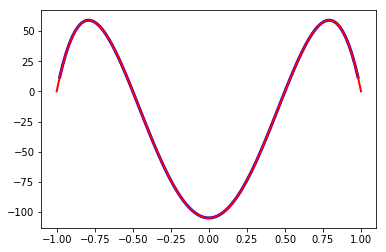

In [8]:
%matplotlib inline
from scipy.special import lpmv
import numpy as np
import matplotlib.pyplot as plt

N = 100
x = np.linspace(-1, 1, N)
m = 3
n = 4

P_expansion = Expand_sqrt_1mx2_dxPmn(m, n)
y = np.zeros(len(x))
for mn in P_expansion:
    y += P_expansion[mn]*lpmv(mn[0], mn[1], x)

dxPmn = (lpmv(m, n, x + 1.0e-3) - lpmv(m, n, x - 1.0e-3))/2.0e-3
Pmn = lpmv(m, n, x)
    
plt.plot(x, np.sqrt(1 - x**2)*dxPmn, "b", lw=3)
plt.plot(x, y, "r", lw=2)


I0:  (152.72727272727275, 1.6956133467002394e-12)
I1:  152.72727272727272


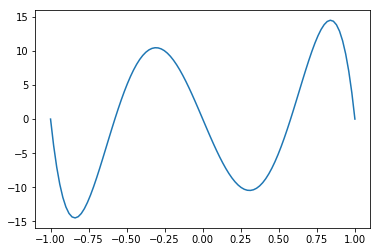

In [48]:
from scipy.integrate import quadrature, quad

m = 2
n = 5

def f(x):
    return lpmv(m, n, x)*lpmv(m, n, x)

I0 = quad(f, -1, 1)
I1 = Get_Int_PmnPmn(m, n)

print("I0: ", I0)
print("I1: ", I1)

x = np.linspace(-1, 1, 100)
plt.plot(x, lpmv(m, n, x))


[ 2.83459410e-02  1.00065279e+00 -2.04714515e-03  2.79125691e-06
 -2.83531597e-09  2.24819629e-12 -1.43421582e-15  7.52903438e-19
 -3.31126746e-22  1.23817198e-25 -3.98548660e-29  1.11607827e-32
 -2.74411318e-36  5.97153690e-40 -1.15829939e-43  2.01530209e-47
 -3.16294946e-51  4.50072407e-55 -5.83321043e-59  6.91488935e-63
 -7.52620238e-67  7.54750352e-71 -6.99633465e-75  6.01275982e-79
 -4.80412551e-83  3.57773598e-87 -2.48940601e-91]


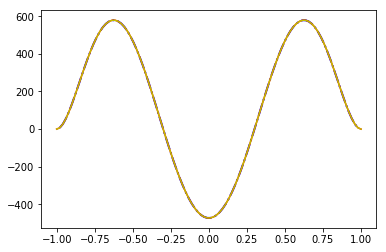

In [6]:
%matplotlib inline
from scipy.special import lpmv
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import pro_ang1
from Electromagnetics import specfun

m = 4
n = 6
c = 1.0
x = np.linspace(-1, 1, 100)

d_mn, d_inds = Get_Expansion_Coeff_d_mn(m, n, c)
print(d_mn)

y = np.zeros(len(x))
for i in range(len(d_mn)):
    y += d_mn[i]*lpmv(m, m+d_inds[i], x)

cv = specfun.segv(m, n, c, 1)[0]
z = np.array([specfun.aswfa(m, n, c, x[i], 1, cv)[0] for i in range(len(x))])

plt.plot(x, pro_ang1(m, n, c, x)[0], 'b-.', lw = 2)
plt.plot(x, y, 'r')
plt.plot(x, z, 'y')


I0:  (26310.287008550986, 0.00020904246597511136)
I1:  (26310.287008550986, 0.00020904246597511136)
I2:   0


-82.31949451815817

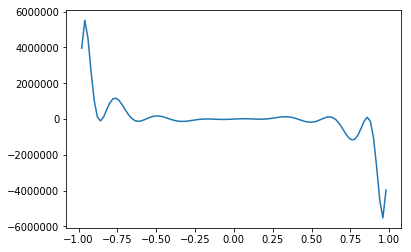

In [44]:
%matplotlib inline
from scipy.integrate import quadrature, quad
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import pro_ang1
from Electromagnetics import specfun

m = 3
n = 5
N = 8
c = 1.0

I0 = GetInt_Sm_mpn_Sm_mpN_x_div_sqrt_1mx2_quad1(c, m, n, N)
I1 = GetInt_Sm_mpn_Sm_mpN_x_div_sqrt_1mx2_quad2(c, m, n, N)
I2 = 0#GetInt_dxS0_n_S1_1pN_sqrt_x_sqrt_1mx2(c, n, N)

print("I0: ", I0)
print("I1: ", I1)
print("I2:  ", I2)

x = np.linspace(-1, 1, 100)
def f(x):
    return pro_ang1(m, m+n, c, x)[1]*pro_ang1(m, m+N, c, x)[0]*x/np.sqrt(1 - x**2)
plt.plot(x, f(x))
f(0.99999)